# Know your customer (KYC) - [Lead Scoring]

## Marketing a new product to customers

In this short note we discuss **customer targeting** through **telemarketing phone calls** to sell **long-term deposits**. More specifically, within a campaign, the human agents execute phone calls to a list of clients to sell the deposit (outbound clients) or, if meanwhile the client calls the contact-center for any other reason, he is asked to subscribe the deposit (inbound client). Thus, the result is a binary one, i.e. the client can either subscribe for a term deposit (**`'yes'`**) or not (**`'no'`**).

The data set we use is provided by the [UCI ML Repository]( https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), has 41188 examples of customer (and prospects) respone in this telemarketing campaign and 20 other attributes. These attributes describe their personal characteristics (e.g. age, type of job, marital status, educational level), their credit and loan data (e.g. credit in default, existence of housing and/or personal loan), details concerning their behavior during the telemarketing campaign (e.g. number of contacts performed,  number of days that passed by after the client was last contacted,  number of contacts performed before this campaign) and some important socioeconomic indicators (e.g. CPI, CCI, euribor 3 month rate). These response data have been ordered by date (from May 2008 to November 2010), and it is very close to the data analyzed in [Moro et al., 2014](http://www.sciencedirect.com/science/article/pii/S016792361400061X) some years ago.

### Data Source / Bibliography:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Dataset has been provided from the UCI ML Repository: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Libraries and Necessary Data Transformation

First we fire up **GraphLab Create**, all the other necessary libraries and load the **bank-marketing** data set in an **SFrame**.

In [1]:
import graphlab as gl
import pandas as pd
from datetime import datetime
from sklearn.cross_validation import StratifiedKFold

A newer version of GraphLab Create (v1.10.1) is available! Your current version is v1.9.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
## load data set from a locally saved csv file
bank_marketing = gl.SFrame.read_csv('./../../../04.UCI.ML.REPO/Bank_Marketing/bank-additional/bank-additional-full.csv',
                                     delimiter=';')

## other methods of loading data sets...

# data = gl.SFrame('s3://' or 'hdfs://')
# data # pySpark RDD or SchemaRDD / Spark DataFrame
# data = gl.SFrame.read_json('')
# With a DB: configure ODBC manager / driver on the machine
# data = gl.connect_odbc?
# data = gl.from_sql?

2016-06-12 08:26:56,791 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: /tmp/graphlab_server_1465709212.log


Finished parsing file /home/theod/Documents/ML_Home/04.UCI.ML.REPO/Bank_Marketing/bank-additional/bank-additional-full.csv

Parsing completed. Parsed 100 lines in 1.02396 secs.

This non-commercial license of GraphLab Create is assigned to tgrammat@gmail.com and will expire on September 21, 2016. For commercial licensing options, visit https://dato.com/buy/.
------------------------------------------------------

Finished parsing file /home/theod/Documents/ML_Home/04.UCI.ML.REPO/Bank_Marketing/bank-additional/bank-additional-full.csv

Parsing completed. Parsed 41188 lines in 0.81011 secs.


Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,int,int,int,int,str,float,float,float,float,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [3]:
bank_marketing.head()

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261
57,services,married,high.school,unknown,no,no,telephone,may,mon,149
37,services,married,high.school,no,yes,no,telephone,may,mon,226
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151
56,services,married,high.school,no,no,yes,telephone,may,mon,307
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198
59,admin.,married,professional.course,no,no,no,telephone,may,mon,139
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217
24,technician,single,professional.course,no,yes,no,telephone,may,mon,380
25,services,single,high.school,no,yes,no,telephone,may,mon,50


### Data Dictionary

The original dataset has the following attribute information:


| Field Num | Field Name | Description |
|---|---|---|
| 1 | **`age`** | (numeric) |
| 2 | **`job`** | type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')|
| 3 | **`marital`** | marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means *divorced* or *widowed*) |
| 4 | **`education`** | (categorical: 'basic.4y', 'basic.6y',  'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') |
| 5 | **`default`** | has credit in default? (categorical: 'no', 'yes', 'unknown') |
| 6 | **`housing`** | has housing loan? (categorical: 'no', 'yes', 'unknown') |
| 7 | **`loan`** | has personal loan? (categorical: 'no', 'yes', 'unknown') |
|---|---|---|
| 8 | **`contact`** | contact communication type (categorical: 'cellular', 'telephone') |
| 9 | **`month`** | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |
| 10 | **`day_of_week`** | last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri') |
| 11 | **`duration`** | last contact duration, in seconds (numeric). ***Important note:*** *this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.* |
|---|---|---|
| 12 | **`campaign`** | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| 13 | **`pdays`** | number of days that passed by after the client was last contacted from a previous campaign (numeric; `999` means client was not previously contacted) |
| 14 | **`previous`** | number of contacts performed before this campaign and for this client (numeric) |
| 15 | **`poutcome`** | outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent' , 'success') |
|---|---|---|
| 16 | **`emp.var.rate`** | employment variation rate - quarterly indicator (numeric) |
| 17 | **`cons.price.idx`** | consumer price index - monthly indicator (numeric) |
| 18 | **`cons.conf.idx`** | consumer confidence index - monthly indicator (numeric) |
| 19 | **`euribor3m`** | euribor 3 month rate - daily indicator (numeric) |
| 20 | **`nr.employed`** | number of employees - quarterly indicator (numeric) |
|---|---|---|
| **21** | **`y`** | **has the client subscribed a term deposit? (binary: 'yes', 'no') [outcome of the marketing campaign]**|

### Exploratory Data Analysis

As shown below, there is no undefined value in any of the provided record lines, neither a strange set of values or outliers different from the expected ones for any of the attributes.

In [4]:
gl.canvas.set_target('ipynb')
bank_marketing.show()

It is also important to note that the original data set has many more **prospects (36548)** than **existent customers (4640)**. However, may be a bad idea to make a stratified split over this data set since we will loose that way the time dimension of the problem. In order to better check if the time dimension is important for this problem and the record provided, we need to re-create the missing calendar dates and transform the original data set in a timeseries object.

### Data Transformation and train/test split

In the few lines of code below:

* We add **calendar dates (`date`)** for the **year**, **month** and **day of week** of each provided record line, and produce the corresponding datetimes.
* Transform the data set in a **Timeseries** object, and
* Take a second look in the data we have available to *check if* the **time-dimension** is *necessary* for this problem.

In [5]:
from helper_functions import *

def _month_to_number(x):
    from dateutil import parser
    return parser.parse(x).strftime('%m')

def _wkday_to_number(x):
    from dateutil import parser
    return parser.parse(x).strftime('%w')

def _str_to_datetime(x):
    import datetime
    import pytz
    from dateutil import parser
    return parser.parse(x).strftime('%Y-%m-%d')

def _unix_timestamp_to_datetime(x):
    import time
    import datetime
    import pytz
    from dateutil import parser
    return parser.parse(x)

In [6]:
bank_marketing['y'] = bank_marketing['y'].apply(lambda x: 1 if x=='yes' else 0)
bank_marketing['month_nr'] = bank_marketing['month'].apply(_month_to_number)
bank_marketing['wkday_nr'] = bank_marketing['day_of_week'].apply(_wkday_to_number)
bank_marketing['year'] = add_running_year(bank_marketing['month_nr'], 2008)
bank_marketing['date'] = add_running_date(bank_marketing, 'year', 'month_nr', 'wkday_nr')
bank_marketing['date'] = bank_marketing.apply(lambda row: '-'.join(map(str,(row['year'], row['month_nr'], row['date']))))
bank_marketing['date'] = bank_marketing['date'].apply(_str_to_datetime)
bank_marketing['date'] = bank_marketing['date'].apply(_unix_timestamp_to_datetime)

In [7]:
bank_marketing

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261
57,services,married,high.school,unknown,no,no,telephone,may,mon,149
37,services,married,high.school,no,yes,no,telephone,may,mon,226
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151
56,services,married,high.school,no,no,yes,telephone,may,mon,307
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198
59,admin.,married,professional.course,no,no,no,telephone,may,mon,139
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217
24,technician,single,professional.course,no,yes,no,telephone,may,mon,380
25,services,single,high.school,no,yes,no,telephone,may,mon,50


In [9]:
bank_marketing = gl.TimeSeries(bank_marketing, index='date')

The provided data set, **`bank_marketing`**, has 41188 record lines describing various customers and prospects attributes, as well as their response in the telemarketing campaign of interest. The percentage of unique calendar dates across this record is low, whereas much more people seems to response positevely as the time goes by. However, some months are missing from the data set and adding time dimension in this problem cannot help to provide better predictions.

In [10]:
print 'Number of record lines [bank_marketing]: %d' % len(bank_marketing)
print 'Unique calendar dates across data set [bank_marketing]: %d' % len(bank_marketing['date'].unique())
unique_dates_pct = (len(bank_marketing['date'].unique())*100/float(len(bank_marketing)))
print 'Percentage of unique calendar dates across data set [bank_marketing]: %.2f%%'% unique_dates_pct

Number of record lines [bank_marketing]: 41188
Unique calendar dates across data set [bank_marketing]: 488
Percentage of unique calendar dates across data set [bank_marketing]: 1.18%


In [11]:
bank_marketing.filter_by(2008,'year')['month_nr'].unique().sort()

dtype: str
Rows: 7
['05', '06', '07', '08', '10', '11', '12']

In [12]:
print 'Full Data Set [year: 2008]:'
print '------------------------------'
bank_marketing_2008 = bank_marketing.filter_by(2008,'year')
customers = len(bank_marketing_2008[bank_marketing_2008['y']==1])
prospects = len(bank_marketing_2008[bank_marketing_2008['y']==0])
print 'Number of examples in year segment [bank_marketing]: %d' % len(bank_marketing_2008)
print 'Number of existent customers: %d (%.2f%%)' % (customers, 100*customers/float(len(bank_marketing_2008)))
print 'Number of prospects: %d (%.2f%%)\n' % (prospects, 100*prospects/float(len(bank_marketing_2008)))

Full Data Set [year: 2008]:
------------------------------
Number of examples in year segment [bank_marketing]: 27690
Number of existent customers: 1339 (4.84%)
Number of prospects: 26351 (95.16%)



In [13]:
bank_marketing.filter_by(2009,'year')['month_nr'].unique().sort()

dtype: str
Rows: 10
['03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [14]:
print 'Full Data Set [year: 2009]:'
print '------------------------------'
bank_marketing_2009 = bank_marketing.filter_by(2009,'year')
customers = len(bank_marketing_2009[bank_marketing_2009['y']==1])
prospects = len(bank_marketing_2009[bank_marketing_2009['y']==0])
print 'Number of examples in year segment [bank_marketing]: %d' % len(bank_marketing_2009)
print 'Number of existent customers: %d (%.2f%%)' % (customers, 100*customers/float(len(bank_marketing_2009)))
print 'Number of prospects: %d (%.2f%%)\n' % (prospects, 100*prospects/float(len(bank_marketing_2009)))

Full Data Set [year: 2009]:
------------------------------
Number of examples in year segment [bank_marketing]: 11440
Number of existent customers: 2228 (19.48%)
Number of prospects: 9212 (80.52%)



In [15]:
bank_marketing.filter_by(2010,'year')['month_nr'].unique().sort()

dtype: str
Rows: 9
['03', '04', '05', '06', '07', '08', '09', '10', '11']

In [16]:
print 'Full Data Set [year: 2010]:'
print '------------------------------'
bank_marketing_2010 = bank_marketing.filter_by(2010,'year')
customers = len(bank_marketing_2010[bank_marketing_2010['y']==1])
prospects = len(bank_marketing_2010[bank_marketing_2010['y']==0])
print 'Number of examples in year segment [bank_marketing]: %d' % len(bank_marketing_2010)
print 'Number of existent customers: %d (%.2f%%)' % (customers, 100*customers/float(len(bank_marketing_2010)))
print 'Number of prospects: %d (%.2f%%)' % (prospects, 100*prospects/float(len(bank_marketing_2010)))

Full Data Set [year: 2010]:
------------------------------
Number of examples in year segment [bank_marketing]: 2058
Number of existent customers: 1073 (52.14%)
Number of prospects: 985 (47.86%)


In order to evaluate our learning algorithms later, we need to make a **train/test split** of the **`bank_marketing` SFrame**. However, due to the *class imbalance* which is observed in contacts' response (it has much more **prospects** than original **customers**), we better do so in a stratified way.

In [17]:
## remove the time dimension of the problem
## transform the Timeseries object in a Numpy array
bank_marketing = bank_marketing.to_sframe().remove_column('date')
features = bank_marketing.column_names()
bank_marketing_np = bank_marketing.to_numpy()

## provide the stratified train/test split
skf = StratifiedKFold(bank_marketing['y'], n_folds=2, shuffle=True, random_state=1)

for train_idx, test_idx in skf:
    train, test = bank_marketing_np[train_idx], bank_marketing_np[test_idx]

train = pd.DataFrame(train, index=train_idx, columns=features)
train = gl.SFrame(train, format='dataframe')
test = pd.DataFrame(test, index=test_idx, columns=features)
test = gl.SFrame(test, format='dataframe')

## restore original dtypes
for attrib in features:
    train[attrib] = train[attrib].astype(bank_marketing[attrib].dtype())
    test[attrib] = test[attrib].astype(bank_marketing[attrib].dtype())

In [18]:
print 'Training Data Set:'
print '---------------------'
train_customers = len(train[train['y']==1])
train_prospects = len(train[train['y']==0])
print 'Number of examples in training set [train]: %d' % len(train)
print 'Number of existent customers: %d (%.2f%%)' % (train_customers, 100*train_customers/float(len(train)))
print 'Number of prospects: %d (%.2f%%)\n' % (train_prospects, 100*train_prospects/float(len(train)))

print 'Test Data Set:'
print '-----------------'
test_customers = len(test[test['y']==1])
test_prospects = len(test[test['y']==0])
print 'Number of examples in validation set [test]: %d' % len(test)
print 'Number of existent customers: %d (%.2f%%)' % (test_customers, 100*test_customers/float(len(test)))
print 'Number of prospects: %d (%.2f%%)' % (test_prospects, 100*test_prospects/float(len(test)))

Training Data Set:
---------------------
Number of examples in training set [train]: 20594
Number of existent customers: 2320 (11.27%)
Number of prospects: 18274 (88.73%)

Test Data Set:
-----------------
Number of examples in validation set [test]: 20594
Number of existent customers: 2320 (11.27%)
Number of prospects: 18274 (88.73%)


## ROI Calculation: Classical Use Case

### Measuring the effectiveness of our lead scoring model

Before we start, let's assume that each phone call to a contact costs **1 USD** and that the **customer lifetime value** for a contact that purchases a term deposit is **100 USD**. Then the **ROI** for calling all the customers in our training dataset is:

In [19]:
def calc_call_roi(contact_list, lead_score, pct_tocall):
    
    #assumptions
    cost_ofcall = 1.00
    cust_ltv = 100.00 #customer lifetime value
    
    num_calls = int(len(contact_list) * pct_tocall)
    
    if 'lead_score' in contact_list.column_names():
        contact_list.remove_column('lead_score')
    
    contact_list = contact_list.add_column(lead_score, name='lead_score')
    
    sorted_bymodel = contact_list.sort('lead_score', ascending=False)
    call_list = sorted_bymodel[:num_calls]
    num_subscriptions = len(call_list[call_list['y']==1])
    
    roi = (num_subscriptions * cust_ltv - num_calls * cost_ofcall) / float(num_calls * cost_ofcall)
    
    return roi

### Call everyone (assuming we have the budget & time to do so), ROI is 10.27%

In [20]:
init_leadscores = gl.SArray([1 for _ in test])
init_roi = calc_call_roi(test, init_leadscores, 1)
print 'ROI for calling all contacts [test]: %.2f%%' % init_roi

ROI for calling all contacts [test]: 10.27%


## Lead Scoring Modeling

## Part 1: Informed Decision

## Targeting employed contacts with age less than 38 (median)

Usually middle-aged, employed people who have good annual earnings are much better prospects to contact and keep them informed for a new product. Indeed, as shown below 11.27% of the contacts in the training set opened a long-term deposit account, whereas 43.06% of them were employed (but not students) and had age less than 38.

In [22]:
num_customers = float(len(train))
numY = gl.Sketch(train['y']).frequency_count(1)
print "%.2f%% of contacts in training set opened long-term deposit accounts." % (numY/num_customers * 100.0)

median_age = gl.Sketch(train['age']).quantile(0.5)

num_purchasing_emp_under_median_age = sum(train.apply(lambda x: 1 if x['age']<median_age 
                                                      and ((x['job']!='unemployed') & 
                                                           (x['job']!='student') & 
                                                           (x['job']!='unknown'))
                                                      and x['y']==1 else 0))
probY_emp_under_median_age = (num_purchasing_emp_under_median_age / float(numY)) * 100.0

print "%.2f%% of the clients who opened long-term deposit accounts, were employed (but not students) and had age < %d (median)." % (probY_emp_under_median_age, median_age)

11.27% of contacts in training set opened long-term deposit accounts.
43.06% of the clients who opened long-term deposit accounts, were employed (but not students) and had age < 38 (median).


### A large proportion of customers who opened deposit accounts were employed (not students), under  38

### Target them as leads and measure our ROI: Major improvement, 28.75%

In [24]:
target_leadscore = test.apply(lambda x: 1 if x['age']<median_age
                              and ((x['job']!='unemployed') & (x['job']!='student') & (x['job']!='unknown'))
                              and x['y']==1 else 0)
age_targeting_roi = calc_call_roi(test, target_leadscore, 0.2)
print 'ROI for targeted calls [employed (not students) and age < %d (median)] to 20%% of contacts: %.2f%%' % (median_age, age_targeting_roi)

ROI for targeted calls [employed (not students) and age < 38 (median)] to 20% of contacts: 28.75%


**Result:**

* **ROI for 20% of targeted contacts (employed and not students, had age < 38): 28.75%**

* **Major improvement over the ROI achieved by calling EVERYONE in list**

* **Calling everyone in list does not have greater ROI!**

## Part 2: Train a Machine Learning model instead

## Learn from ALL features, not just age or status of employment

### GraphLab Create AutoML to choose the most effective classifer model automatically!

Dato's classifier toolkit can choose the most effective classifier model automatically.

In [23]:
## remove features that introduce noise in ML prediction
features = train.column_names()
features.remove('duration')
features.remove('y')
features.remove('month_nr')
features.remove('wkday_nr')
features.remove('year')

## GLC AutoML Classifier
toolkit_model = gl.classifier.create(train, features=features, target='y')

External memory mode: 1 batches

External memory mode: 1 batches

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19590

Number of classes           : 2

Number of feature columns   : 19

Number of unpacked features : 19

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.371507     | 0.906687          | 0.513880          | 0.894422            | 0.518177            |

| 2         | 0.723152     | 0.908167          | 0.416551          | 0.897410            | 0.424971            |

| 3         | 1.121408     | 0.909035          | 0.358208          | 0.898406            | 0.367687            |

| 4         | 1.502393     | 0.909648          | 0.321132          | 0.891434            | 0.332011            |

| 5         | 1.863628     | 0.909393          | 0.297110          | 0.892430            | 0.309859            |

| 6         | 2.235585     | 0.909546          | 0.281510          | 0.895418            | 0.296247            |

| 10        | 3.863795     | 0.910720          | 0.255432          | 0.896414            | 0.274298            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

External memory mode: 1 batches

External memory mode: 1 batches

Random forest classifier:

--------------------------------------------------------

Number of examples          : 19590

Number of classes           : 2

Number of feature columns   : 19

Number of unpacked features : 19

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.315220     | 0.904390          | 0.307124          | 0.894422            | 0.319115            |

| 2         | 0.654153     | 0.906381          | 0.304510          | 0.898406            | 0.317740            |

| 3         | 0.983775     | 0.906177          | 0.303580          | 0.897410            | 0.316289            |

| 4         | 1.309633     | 0.907198          | 0.303119          | 0.892430            | 0.316431            |

| 5         | 1.622859     | 0.906840          | 0.303355          | 0.892430            | 0.315837            |

| 6         | 1.955672     | 0.907044          | 0.303177          | 0.893426            | 0.315777            |

| 10        | 3.255839     | 0.906585          | 0.302888          | 0.896414            | 0.315177            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

External memory mode: 1 batches

External memory mode: 1 batches

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 19590

Number of classes           : 2

Number of feature columns   : 19

Number of unpacked features : 19

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.366580     | 0.906687          | 0.513880          | 0.894422            | 0.518177            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 19590

Number of classes           : 2

Number of feature columns   : 19

Number of unpacked features : 19

Number of coefficients    : 53

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 4        | 0.000026  | 0.130114     | 0.887034          | 0.893426            |

| 2         | 7        | 5.000000  | 0.223343     | 0.894232          | 0.882470            |

| 3         | 8        | 5.000000  | 0.274143     | 0.113017          | 0.106574            |

| 4         | 10       | 1.000000  | 0.357703     | 0.893466          | 0.887450            |

| 5         | 11       | 1.000000  | 0.418430     | 0.887443          | 0.894422            |

| 6         | 16       | 2.000000  | 0.556632     | 0.895661          | 0.892430            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

Logistic regression:

--------------------------------------------------------

Number of examples          : 19590

Number of classes           : 2

Number of feature columns   : 19

Number of unpacked features : 19

Number of coefficients    : 53

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.493707     | 0.901072          | 0.896414            |

| 2         | 3        | 0.728375     | 0.901174          | 0.896414            |

| 3         | 4        | 0.972774     | 0.901225          | 0.895418            |

| 4         | 5        | 1.212193     | 0.901174          | 0.896414            |

| 5         | 6        | 1.448106     | 0.901174          | 0.896414            |

| 6         | 7        | 1.693367     | 0.901174          | 0.896414            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.
PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.896414339542
PROGRESS: RandomForestClassifier          : 0.896414339542
PROGRESS: DecisionTreeClassifier          : 0.894422292709
PROGRESS: SVMClassifier                   : 0.891434
PROGRESS: LogisticClassifier              : 0.896414
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


The toolkit *automatically* evaluates several types of algorithms, including: **Boosted Trees**, **Random Forests**, **Decision Trees**, **Support Vector Machines**, **Logistic regression** - with intelligent default paramters. Based on a **validation set**, it chooses the *most accurate model* which in our case is a **Boosted Trees Classifier**. We can then evaluate this model on the **`test`** data set.

In [24]:
results = toolkit_model.evaluate(test)
print "accuracy: %.5f, precision: %.5f, recall: %.5f" % (results['accuracy'], results['precision'], results['recall'])

External memory mode: 1 batches

accuracy: 0.90026, precision: 0.65947, recall: 0.23707


This initial model can be considered accurate given that it correctly predicts the purchasing decisions of ~90% of the contacts. However, the **`toolkit_model`** leaves room for improvement. Specifically only ~66% of predicted sales actually convert to sales. Furthermore, only ~24% of actual sales were actually predicted by the model. In order to better understand the model we can review the importance of the input features.

In [25]:
toolkit_model.get_feature_importance()

name,index,count
age,None,104
euribor3m,None,60
campaign,None,39
pdays,None,21
day_of_week,mon,19
contact,telephone,18
previous,None,15
cons.price.idx,None,15
education,university.degree,14
nr.employed,None,13


### Lead score the contact list and measure our ROI: Major improvement again, 34.87%

After scoring the list by probability to purchase, the ROI for calling the top 20% of the list is:

In [26]:
toolkit_leadscore = toolkit_model.predict(test,output_type='probability')
toolkit_roi = calc_call_roi(test, toolkit_leadscore, 0.2 )
print 'ROI for calling 20%% of highest predicted contacts: %.2f%%' % toolkit_roi

External memory mode: 1 batches

ROI for calling 20% of highest predicted contacts: 34.87%


**Result:**

* **ROI for 20% of contacts as sorted by the descending lead score which was returned by the AutoML Classifier: 34.87%.** 
* **Huge improvement (3x greater) over the ROI achieved by calling EVERYONE in list.**
* **Improved ROI (6.12% greater) than the ROI achieved by calling 20% of the targeted contacts of Part 1 above (employed, middle-aged people).**

## Part 3: Tweak the ML Classifier

## Adding quadratic interactions, tweak parameters

The scatter plots diagrams among the various **`int`** and **`float`** **variables** of the **`train`** data set, and more specifically the four plots below, suggest to investigate if interactions between these features exist:

```python
qfeatures0 = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']
```

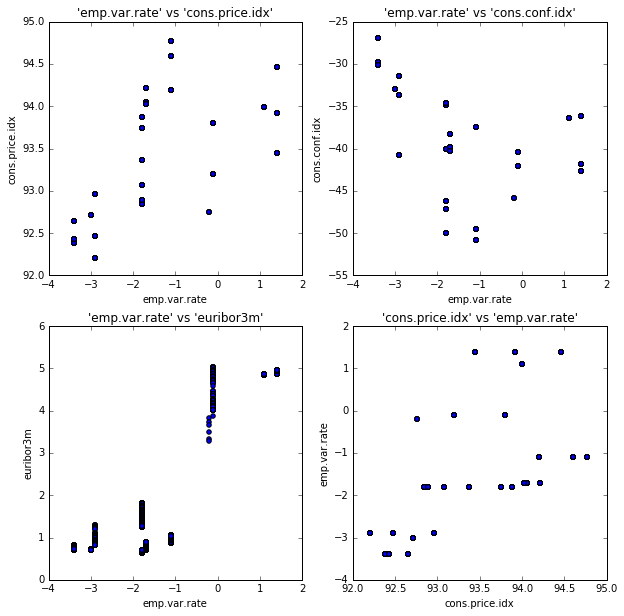

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

qfeatures0 = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']

plt.figure(figsize=(10,10))
subplot_idx = 1
for attrib1 in qfeatures0:
    for attrib2 in qfeatures0:
        if(attrib2 != attrib1):
            if subplot_idx < 5:
                plt.subplot(2,2,subplot_idx)
                plt.scatter(train[attrib1], train[attrib2])
                plt.xlabel(attrib1)
                plt.ylabel(attrib2)
                plt.title('\'%s\' vs \'%s\'' % (attrib1, attrib2))
                subplot_idx +=1
plt.show()

Next we add **quadratic interactions** between the four features below:

```python
qfeatures0 = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']
```

In [27]:
## define a quadratic transformer object
quadratic_transformer = gl.feature_engineering.QuadraticFeatures(features=qfeatures0)

## fit the quadratic transformer object over the train set
quadratic = gl.feature_engineering.create(train, quadratic_transformer)

## transform the train data set
qtrain = quadratic.transform(train)

## remove the features that may worse our predictions
qfeatures = qtrain.column_names()
qfeatures.remove('duration')
qfeatures.remove('y')
qfeatures.remove('month_nr')
qfeatures.remove('wkday_nr')
qfeatures.remove('year')

In [28]:
qtrain.head(5)

Columns:
	age	int
	job	str
	marital	str
	education	str
	default	str
	housing	str
	loan	str
	contact	str
	month	str
	day_of_week	str
	duration	int
	campaign	int
	pdays	int
	previous	int
	poutcome	str
	emp.var.rate	float
	cons.price.idx	float
	cons.conf.idx	float
	euribor3m	float
	nr.employed	int
	y	int
	month_nr	str
	wkday_nr	str
	year	int
	quadratic_features	dict

Rows: 5

Data:
+-----+-----------+---------+---------------------+---------+---------+------+
| age |    job    | marital |      education      | default | housing | loan |
+-----+-----------+---------+---------------------+---------+---------+------+
|  56 | housemaid | married |       basic.4y      |    no   |    no   |  no  |
|  37 |  services | married |     high.school     |    no   |   yes   |  no  |
|  40 |   admin.  | married |       basic.6y      |    no   |    no   |  no  |
|  56 |  services | married |     high.school     |    no   |    no   | yes  |
|  59 |   admin.  | married | professional.course |    no   |    no   |  no  |
+-----+-----------+---------+---------------------+---------+---------+------+
+-----------+-------+-------------+----------+----------+-------+----------+
|  contact  | month | day_of_week | duration | campaign | pdays | previous |
+-----------+-------+-------------+----------+----------+-------+----------+
| telephone |  may  |     mon     |   261    |    1     |  999  |    0     |
| telephone |  may  |     mon     |   226    |    1     |  999  |    0     |
| telephone |  may  |     mon     |   151    |    1     |  999  |    0     |
| telephone |  may  |     mon     |   307    |    1     |  999  |    0     |
| telephone |  may  |     mon     |   139    |    1     |  999  |    0     |
+-----------+-------+-------------+----------+----------+-------+----------+
+-------------+--------------+----------------+---------------+-----------+-------------+-----+
|   poutcome  | emp.var.rate | cons.price.idx | cons.conf.idx | euribor3m | nr.employed | ... |
+-------------+--------------+----------------+---------------+-----------+-------------+-----+
| nonexistent |     1.1      |     93.994     |     -36.4     |   4.857   |     5191    | ... |
| nonexistent |     1.1      |     93.994     |     -36.4     |   4.857   |     5191    | ... |
| nonexistent |     1.1      |     93.994     |     -36.4     |   4.857   |     5191    | ... |
| nonexistent |     1.1      |     93.994     |     -36.4     |   4.857   |     5191    | ... |
| nonexistent |     1.1      |     93.994     |     -36.4     |   4.857   |     5191    | ... |
+-------------+--------------+----------------+---------------+-----------+-------------+-----+
[5 rows x 25 columns]

and *re-train* the **GraphLab Create AutoML Classifier** for this new data set **qtrain**.

In [38]:
new_toolkit_model = gl.classifier.create(qtrain, target='y', features=qfeatures)

External memory mode: 1 batches

External memory mode: 1 batches

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19555

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 29

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.581459     | 0.905651          | 0.514996          | 0.901829            | 0.515365            |

| 2         | 1.166788     | 0.907543          | 0.417796          | 0.904716            | 0.417690            |

| 3         | 1.724620     | 0.909588          | 0.358957          | 0.906641            | 0.358746            |

| 4         | 2.241803     | 0.909588          | 0.321567          | 0.905679            | 0.320723            |

| 5         | 2.800809     | 0.909793          | 0.296847          | 0.903754            | 0.294955            |

| 6         | 3.385532     | 0.909997          | 0.280859          | 0.909528            | 0.279289            |

| 10        | 5.639960     | 0.911020          | 0.254782          | 0.909528            | 0.258142            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

External memory mode: 1 batches

External memory mode: 1 batches

Random forest classifier:

--------------------------------------------------------

Number of examples          : 19555

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 29

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.492449     | 0.905293          | 0.306434          | 0.907603            | 0.296367            |

| 2         | 1.010088     | 0.907236          | 0.303651          | 0.900866            | 0.297267            |

| 3         | 1.534677     | 0.907441          | 0.303144          | 0.906641            | 0.296146            |

| 4         | 2.068758     | 0.907747          | 0.303054          | 0.905679            | 0.297135            |

| 5         | 2.633881     | 0.907031          | 0.303153          | 0.907603            | 0.297140            |

| 6         | 3.176735     | 0.906009          | 0.303430          | 0.907603            | 0.296610            |

| 10        | 5.243992     | 0.905753          | 0.303351          | 0.907603            | 0.297765            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

External memory mode: 1 batches

External memory mode: 1 batches

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 19555

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 29

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.607973     | 0.905651          | 0.514996          | 0.901829            | 0.515365            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 19555

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 29

Number of coefficients    : 63

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 4        | 0.000026  | 0.278351     | 0.887343          | 0.887392            |

| 2         | 7        | 5.000000  | 0.491244     | 0.889900          | 0.895091            |

| 3         | 8        | 5.000000  | 0.602432     | 0.286167          | 0.306064            |

| 4         | 10       | 1.000000  | 0.762487     | 0.895525          | 0.898941            |

| 5         | 11       | 1.000000  | 0.873770     | 0.895883          | 0.898941            |

| 6         | 12       | 1.000000  | 0.986148     | 0.778829          | 0.780558            |

| 10        | 18       | 1.000000  | 1.475051     | 0.897929          | 0.902791            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

Logistic regression:

--------------------------------------------------------

Number of examples          : 19555

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 29

Number of coefficients    : 63

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.378109     | 0.900997          | 0.905679            |

| 2         | 3        | 0.587097     | 0.901048          | 0.905679            |

| 3         | 4        | 0.811631     | 0.901662          | 0.905679            |

| 4         | 5        | 1.014935     | 0.901969          | 0.905679            |

| 5         | 6        | 1.212924     | 0.901918          | 0.905679            |

| 6         | 7        | 1.414642     | 0.901918          | 0.905679            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.
PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.909528374672
PROGRESS: RandomForestClassifier          : 0.907603442669
PROGRESS: DecisionTreeClassifier          : 0.901828706264
PROGRESS: SVMClassifier                   : 0.902791
PROGRESS: LogisticClassifier              : 0.905679
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


Next, we evaluate the new **AutoML Classifier**, **`new_toolkit_model`**, on the **`test`** data set.

In [39]:
results = new_toolkit_model.evaluate(quadratic.transform(test))
print "accuracy: %.5f, precision: %.5f, recall: %.5f" % (results['accuracy'], results['precision'], results['recall'])    

External memory mode: 1 batches

accuracy: 0.90012, precision: 0.65862, recall: 0.23534


Note that this model is almost as accurate as the previous one, with similar precision (~66% of the predicted sales were actually converted to sales) and recall (~24% of actual sales were actually predicted by the model). However, to have a better feeling of the model just trained (**`newtoolkit_model`**) and how this differs from the previous one (**`toolkit_model`**), we can review the importance of the input features in these two cases.

In [40]:
print '\'newtoolkit_model\'\n[GLC AutoML Classifier wt quadratic interactions]:\n'
print new_toolkit_model.get_feature_importance()

'newtoolkit_model'
[GLC AutoML Classifier wt quadratic interactions]:

+--------------------+--------------------------+-------+
|        name        |          index           | count |
+--------------------+--------------------------+-------+
|        age         |           None           |   96  |
|     euribor3m      |           None           |   54  |
|      campaign      |           None           |   39  |
| quadratic_features | emp.var.rate, euribor3m  |   25  |
| quadratic_features | cons.conf.idx, euribor3m |   25  |
|       pdays        |           None           |   20  |
|    day_of_week     |           mon            |   18  |
|      contact       |        telephone         |   16  |
|      previous      |           None           |   12  |
|        job         |         unknown          |   10  |
+--------------------+--------------------------+-------+
[72 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n)

In [41]:
print '\'toolkit_model\'\n[GLC AutoML Classifier wo quadratic interactions]:\n'
print toolkit_model.get_feature_importance()

'toolkit_model'
[GLC AutoML Classifier wo quadratic interactions]:

+----------------+-------------------+-------+
|      name      |       index       | count |
+----------------+-------------------+-------+
|      age       |        None       |  104  |
|   euribor3m    |        None       |   60  |
|    campaign    |        None       |   39  |
|     pdays      |        None       |   21  |
|  day_of_week   |        mon        |   19  |
|    contact     |     telephone     |   18  |
|    previous    |        None       |   15  |
| cons.price.idx |        None       |   15  |
|   education    | university.degree |   14  |
|  nr.employed   |        None       |   13  |
+----------------+-------------------+-------+
[62 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


By comparing these two models we note that:

1. The **quadratic interactions:**

    * **`emp.var.rate`** &lowast; **`euribor3m`**
    * **`cons.conf.idx`** &lowast; **`euribor3m`**
    
    seems to be important if we want to build a more accurate model and they should not be neglected.
2. **`age`**, **`euribor3m`** and **`campaign`** features are significant in both cases.
3. The number of days that passed by after the client was last contacted from a previous campaign (**`pdays`**), the number of contacts performed before this campaign and for this client (**`previous`**), as well as the channel through which the contact has been made (**`contact: 'telephone'`**) are important for both models.
4. The specific **`day_of_week` (`'mon'`)** that the contact has been made seems to be important for both models.

### Lead score the contact list and measure our ROI: New Improvement achieved, 35.01%

As a last step of evaluating the **`newtoolkit_model`**, lets compute our ROI if we again contact the 20% of the leads that this new model scored.

In [42]:
## show ROI for experimentation model
newtoolkit_leadscore = new_toolkit_model.predict(quadratic.transform(test),output_type='probability')
newtoolkit_roi = calc_call_roi(quadratic.transform(test), newtoolkit_leadscore, 0.2)
print 'ROI for calling predicted contacts: %.2f%%' % newtoolkit_roi

External memory mode: 1 batches

ROI for calling predicted contacts: 35.01%


**Result:**

* **ROI for 20% of the leads returned by the AutoML Classifier [wt quadratic interactions]: 34.87%.**
* **Improved ROI (0.14% greater) than the ROI achieved by calling 20% of the leads returned by the AutoML Classifier [wo quadratic interactions].**

### GraphLab Create Boosted Trees Classifier: 

### Contacts' `age` grouping, hyperparameters fine-tuning

As it is obvious from the histogram below most of our contacts were between 30 to 36 years old, 4518 contacts were between 36 to 43, 2931 people between 43 to 50 and about 2500 people between 23 to 30 and 50 to 56 years old. The remaining contacts were either younger or older than these ages, but certainly not more than 1000 cases or so in a specific age group. Therefore, grouping the **`age`** values of our contacts into a pre-defined number of bins may be beneficial for the learning algorithm of choice, and may improve the ROI of our telemarketing campaign even further.

In [35]:
qtrain['age'].show()

To group the **`age`** values of our contacts we leverage the **`FeatureBinner`** method of the **`feature_engineering`**  toolkit of **GraphLab Create** as shown below.

In [45]:
## define a binning transformer for the age attribute of contacts
age_binning_transformer = gl.feature_engineering.FeatureBinner(features='age', strategy='quantile', num_bins=12)

## fit the age binning transformer over the train set
age_binning = gl.feature_engineering.create(train, age_binning_transformer)

## transform the train data set
qtrain1 = age_binning.transform(qtrain)

## remove the features that may worse our predictions
qfeatures1 = qtrain1.column_names()
qfeatures1.remove('duration')
qfeatures1.remove('y')
qfeatures1.remove('month_nr')
qfeatures1.remove('wkday_nr')
qfeatures1.remove('year')

In [46]:
qtrain1['age'].show()

Lets now train a **boosted trees classifier** model using this enriched data set, **`qtrain1`**. We have also tweak its parameters to achieve better predictive performance.

In [148]:
## We create a boosted trees classifier with the enriched dataset.
new_boostedtrees_model = gl.boosted_trees_classifier.create(qtrain1, target='y', features = qfeatures1,
                                                            max_iterations = 100,
                                                            max_depth=5,
                                                            step_size=0.1,
                                                            min_child_weight=0.06,
                                                            random_seed=1,
                                                            early_stopping_rounds=10)

External memory mode: 1 batches

External memory mode: 1 batches

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19573

Number of classes           : 2

Number of feature columns   : 20

Number of unpacked features : 29

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.547360     | 0.902723          | 0.627169          | 0.894221            | 0.629272            |

| 2         | 1.063238     | 0.905073          | 0.573160          | 0.890304            | 0.577245            |

| 3         | 1.518069     | 0.905073          | 0.528401          | 0.890304            | 0.534260            |

| 4         | 2.045868     | 0.905278          | 0.490751          | 0.892262            | 0.497720            |

| 5         | 2.579916     | 0.905380          | 0.458904          | 0.892262            | 0.467423            |

| 6         | 3.028595     | 0.905482          | 0.431841          | 0.892262            | 0.441796            |

| 10        | 4.814942     | 0.905840          | 0.356626          | 0.892262            | 0.370684            |

| 11        | 5.302796     | 0.905942          | 0.343778          | 0.891283            | 0.358383            |

| 15        | 7.094960     | 0.905891          | 0.307105          | 0.894221            | 0.325404            |

| 20        | 9.471095     | 0.906351          | 0.282037          | 0.895201            | 0.305777            |

| 25        | 11.696247    | 0.906657          | 0.269412          | 0.896180            | 0.297596            |

| 30        | 13.950028    | 0.907066          | 0.262629          | 0.896180            | 0.294010            |

| 35        | 16.213339    | 0.907730          | 0.258599          | 0.895201            | 0.293437            |

| 40        | 18.409352    | 0.908241          | 0.255685          | 0.896180            | 0.292832            |

| 45        | 20.572792    | 0.909161          | 0.253490          | 0.898139            | 0.292911            |

| 50        | 22.812334    | 0.909723          | 0.251676          | 0.895201            | 0.292992            |

| 51        | 23.263687    | 0.909518          | 0.251416          | 0.895201            | 0.293003            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

Early stop triggered. Returning the best model at iteration: 42

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Next we evaluate the **`new_boostedtrees_model`** on the **test** data set.

In [159]:
results = new_boostedtrees_model.evaluate(age_binning.transform(quadratic.transform(test)))
print "accuracy: %.5f, precision: %.5f, recall: %.5f" % (results['accuracy'], results['precision'], results['recall'])

External memory mode: 1 batches

accuracy: 0.90012, precision: 0.66255, recall: 0.23103


This new model (**`new_boostedtrees_model`**) is almost as accurate as the previous one, has higher precision (~66% of the predicted sales were actually converted to sales) and similar recall (~23% of actual sales were actually predicted by the model). To have a better feeling of the model just trained (**`newtoolkit_model`**) and how this differs from the previous one (**`new_toolkit_model`**), we can review the importance of the input features in these two cases.

In [161]:
print '\'new_boostedtrees_model\'\n[GLC Boosted Trees Classifier wt quadratic interactions,\
age grouping & hyperparams tuned]:\n'
new_boostedtrees_model.get_feature_importance().print_rows(num_rows=20)

'new_boostedtrees_model'
[GLC Boosted Trees Classifier wt quadratic interactions,age grouping & hyperparams tuned]:

+--------------------+------------------------------+-------+
|        name        |            index             | count |
+--------------------+------------------------------+-------+
|     euribor3m      |             None             |  105  |
| quadratic_features |   emp.var.rate, euribor3m    |   91  |
|      campaign      |             None             |   89  |
| quadratic_features |   cons.conf.idx, euribor3m   |   64  |
|      contact       |          telephone           |   53  |
|       pdays        |             None             |   39  |
| quadratic_features |  cons.price.idx, euribor3m   |   33  |
|    day_of_week     |             mon              |   31  |
|      previous      |             None             |   27  |
| quadratic_features | cons.price.idx, emp.var.rate |   26  |
|        loan        |             yes              |   25  |
|    nr.employe

In [46]:
print '\'newtoolkit_model\'\n[GLC AutoML Classifier wt quadratic interactions]:\n'
print new_toolkit_model.get_feature_importance()

'newtoolkit_model'
[GLC AutoML Classifier wt quadratic interactions]:

+--------------------+--------------------------+-------+
|        name        |          index           | count |
+--------------------+--------------------------+-------+
|        age         |           None           |   96  |
|     euribor3m      |           None           |   54  |
|      campaign      |           None           |   39  |
| quadratic_features | emp.var.rate, euribor3m  |   25  |
| quadratic_features | cons.conf.idx, euribor3m |   25  |
|       pdays        |           None           |   20  |
|    day_of_week     |           mon            |   18  |
|      contact       |        telephone         |   16  |
|      previous      |           None           |   12  |
|        job         |         unknown          |   10  |
+--------------------+--------------------------+-------+
[72 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n)

By comparing these two cases, we note that:

1. These two quadratic interactions:
    * **`cons.price.idx`** &lowast; **`euribor3m`** 
    * **`cons.price.idx`** &lowast; **`emp.var.rate`**
    enters the **`new_boostedtrees_model`** as significant attributes.
2.  **`euribor3m`** and **`campaign`** features are significant in both cases whereas **`age`** is far less important in this new tweaked model.
3. Various characteristics concerning the campaign, such as the number of days that passed by after the client was last contacted from a previous campaign (**`pdays`**), the number of contacts performed before this campaign and for this client (**`previous`**), the channel through which the contact has been made (**`contact: 'telephone'`**), as well as the specific **`day_of_week` (`'mon'`)** that this contact occured seems to be important for both models.
4. In this tweaked **`new_boostedtrees_model`**, attributes describing if the contact has a personal loan (**`loan`**) or credit in default (**`default`**), his/her educational (**`education`**) and employment status (**`job`**), as well as the outcome of the previous marketing campaign (**`poutcome`**) gets greater importance than before.

### Lead score the contact list and measure our ROI: New Improvement achieved, 35.13%

As a last step of evaluating the **`new_boostedtrees_model`**, lets compute our ROI if we again contact 20% of the contact leads as scored by this new model.

In [176]:
## show ROI for experimentation model
test1 = age_binning.transform(quadratic.transform(test))
boostedtrees_leadscore = new_boostedtrees_model.predict(test1, output_type='probability')
boostedtrees_roi = calc_call_roi(test1, boostedtrees_leadscore, 0.2)
print 'ROI for calling predicted contacts: %.2f%%' % boostedtrees_roi

External memory mode: 1 batches

ROI for calling predicted contacts: 35.13%


>### Conclusion:
>
>**We will choose the `new_boostedtrees_model` to lead score the contact list. By doing so, we can achieve a 35.13% ROI by only contacting 20% of the people in this list. Assuming we had the budget and time to contact everyone in list, we will have an ROI of only 10.27%, a fact that emphasize the importance of lead scoring as a method. Furthermore, the ROI achieved by our tuned `new_boostedtrees_model` is significantly greater than the ROI returned by simply targeting employed, middle-aged people which was found to be 28.75%.**

## Ranked List for Marketing / Sales Teams as returned by the best ML Model

## Who should be prioritized to be called next!

Assuming we have time and resources to call 20% of the lead scored contact list, these would be the first 30 people that we should call first:

In [183]:
pct_tocall = 0.2
boostedtrees_list = test1.sort('lead_score', ascending=False)
num_calls = int(len(boostedtrees_list)*pct_tocall)

print 'Assuming we have time and resources to call %d%% of the lead scored contact list, we\
need to make %d phone calls.\n' % (pct_tocall*100, num_calls)

print 'Lead Scored Contact List:'
boostedtrees_list['lead_score', 'age','campaign','euribor3m','job','loan', 'default', 'poutcome'].\
print_rows(num_rows=50, max_row_width=100)

Assuming we have time and resources to call 20% of the lead scored contact list, weneed to make 4118 phone calls.

Lead Scored Contact List:
+----------------+--------+----------+-----------+--------------+---------+---------+-------------+
|   lead_score   |  age   | campaign | euribor3m |     job      |   loan  | default |   poutcome  |
+----------------+--------+----------+-----------+--------------+---------+---------+-------------+
| 0.89590626955  | age_1  |    2     |   0.697   |   student    |    no   |    no   |   success   |
| 0.893145561218 | age_1  |    1     |   0.635   |   student    |    no   |    no   |   success   |
| 0.88779938221  | age_11 |    1     |   0.683   |   retired    |    no   |    no   |   success   |
| 0.88158929348  | age_11 |    3     |   0.683   |  management  |    no   |    no   |   success   |
| 0.881256341934 | age_11 |    1     |   0.654   |    admin.    |    no   |    no   |   success   |
| 0.876329660416 | age_1  |    1     |   0.677   |   studen

Note, that quite differently from our informed decision of Part 1, this new tweaked **`new_boostedtrees_model`** predicts high lead scores for students and retired people who have no a personal loan or credit in default. As a result, the model suggests to include them in our target contacts.